# CAR PRICE PREDICTION

# Problem classification
The main objective is predicting the prices of used cars

# Dataset
the dataset used in this project was obtained from kaggle and has the following columns

* car brand

* year

* selling price

* present price

* kms driven

* fuel type

* seller type

* transmission type

* owners

The target variable is the selling price while the others are the features


# Tools preparation

pandas and numpy for data analysis and exploration

seaborn and matplotlib fot data visualization

linearRegression and lasso are used for building a model

Mean Error Score,mean squared error is  for metrics purposes


# importing the dependencies


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


# loading dataset

In [2]:
data=pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# data analysis

# checking the number of rows and columns

In [4]:
data.shape

(301, 9)

# checking the columns names

In [5]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

# value_counts

In [34]:
data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [7]:
data["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [8]:
data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
data["Selling_type"].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

# checking for null values

In [11]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# checking for duplicates

In [12]:
data.duplicated().sum()

2

# getting the summary of the data

In [13]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# getting information about dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Data visualization using seaborn,matplotlib

# categorical plots
there are used to show the relationship of columns that are categorical

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

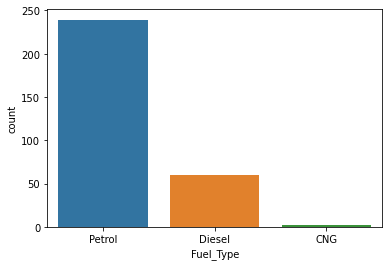

In [22]:
#countplots
sns.countplot("Fuel_Type",data=data)

<AxesSubplot:xlabel='Transmission', ylabel='count'>

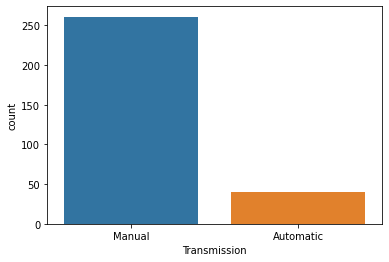

In [24]:
sns.countplot("Transmission",data=data)

<AxesSubplot:xlabel='Selling_type', ylabel='count'>

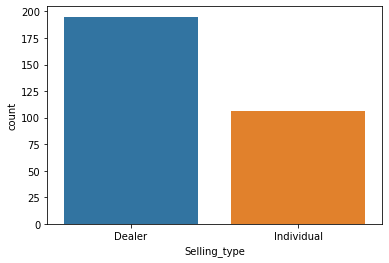

In [25]:
sns.countplot("Selling_type",data=data)

<AxesSubplot:xlabel='Owner', ylabel='count'>

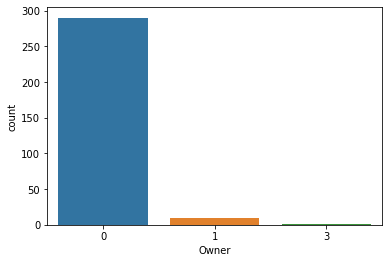

In [27]:
sns.countplot("Owner",data=data)

# distribution plots
they are used to  show the distribution of the  columns that are numerical

<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

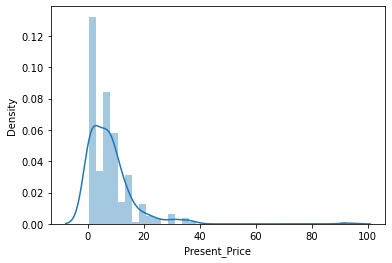

In [15]:

# to remove warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
#distplot= used to check trhe distribution of the column feature since it is meant for univariate analysis
sns.distplot(data["Present_Price"])


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

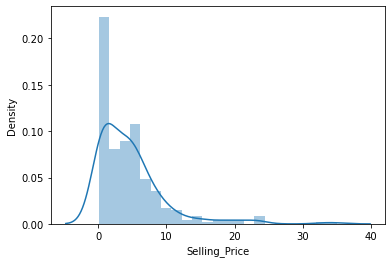

In [16]:
sns.distplot(data["Selling_Price"])

<AxesSubplot:xlabel='Driven_kms', ylabel='Density'>

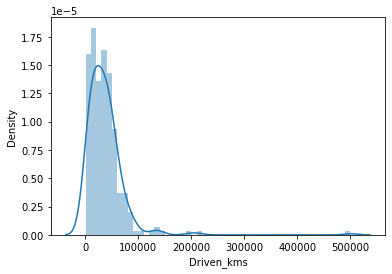

In [22]:
sns.distplot(data["Driven_kms"])

# jointplot:
    used in bivariate analysis to show the relationship between two variables

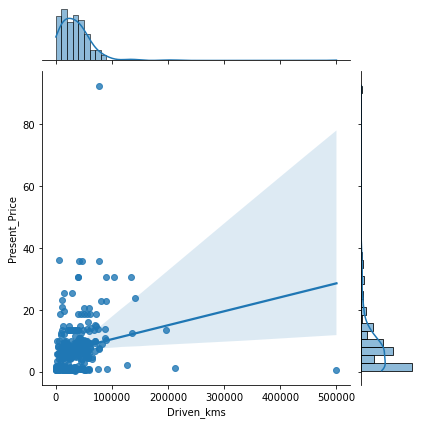

In [24]:
sns.jointplot(data=data,x="Driven_kms",y="Present_Price",kind="reg")

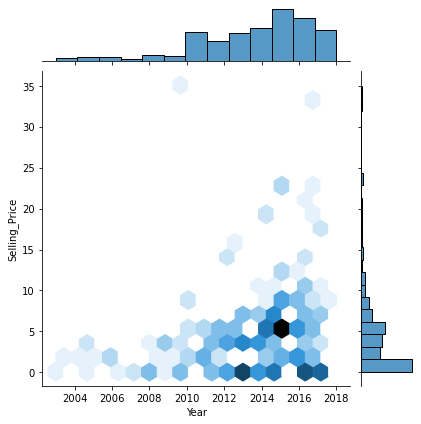

In [27]:
sns.jointplot(data=data,x="Year",y="Selling_Price",kind="hex")

# pairplot:
    it is used to show the relationship/distribution for more than two fesatures

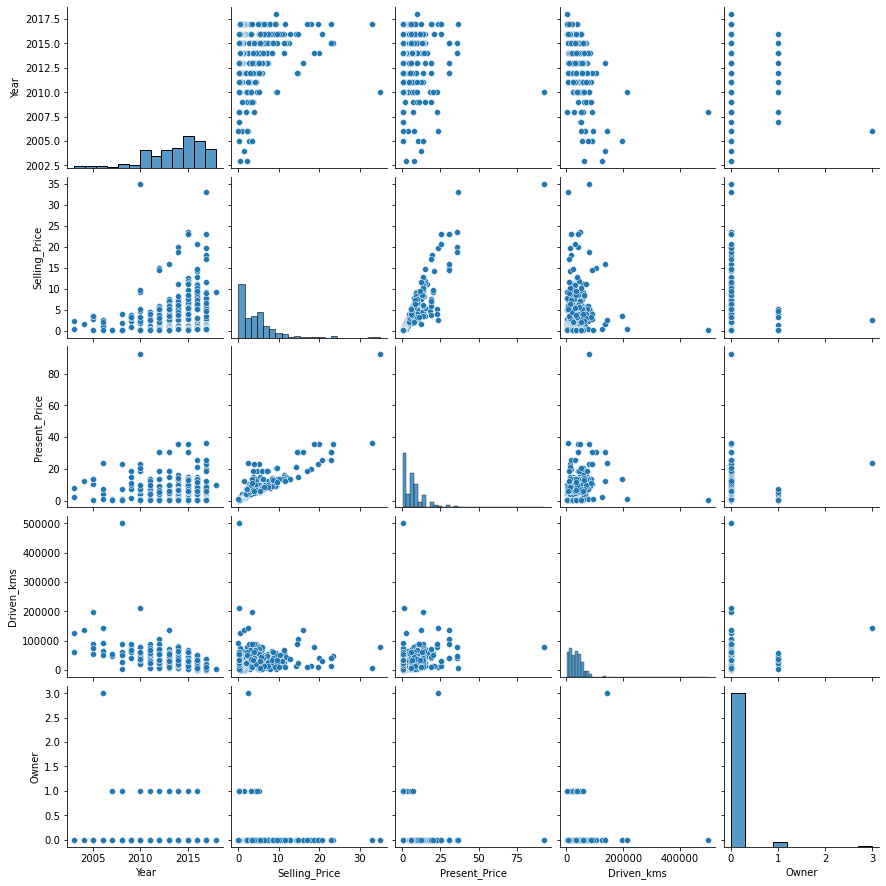

In [29]:
sns.pairplot(data)

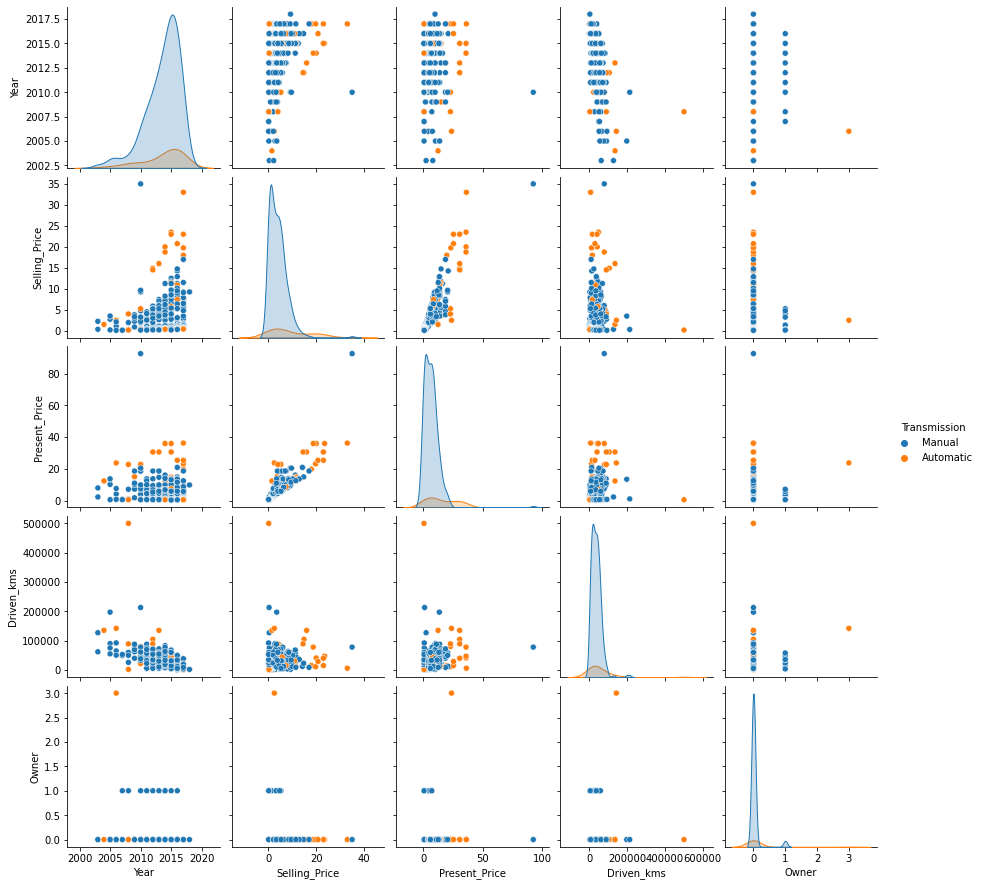

In [17]:
sns.pairplot(data,hue="Transmission")

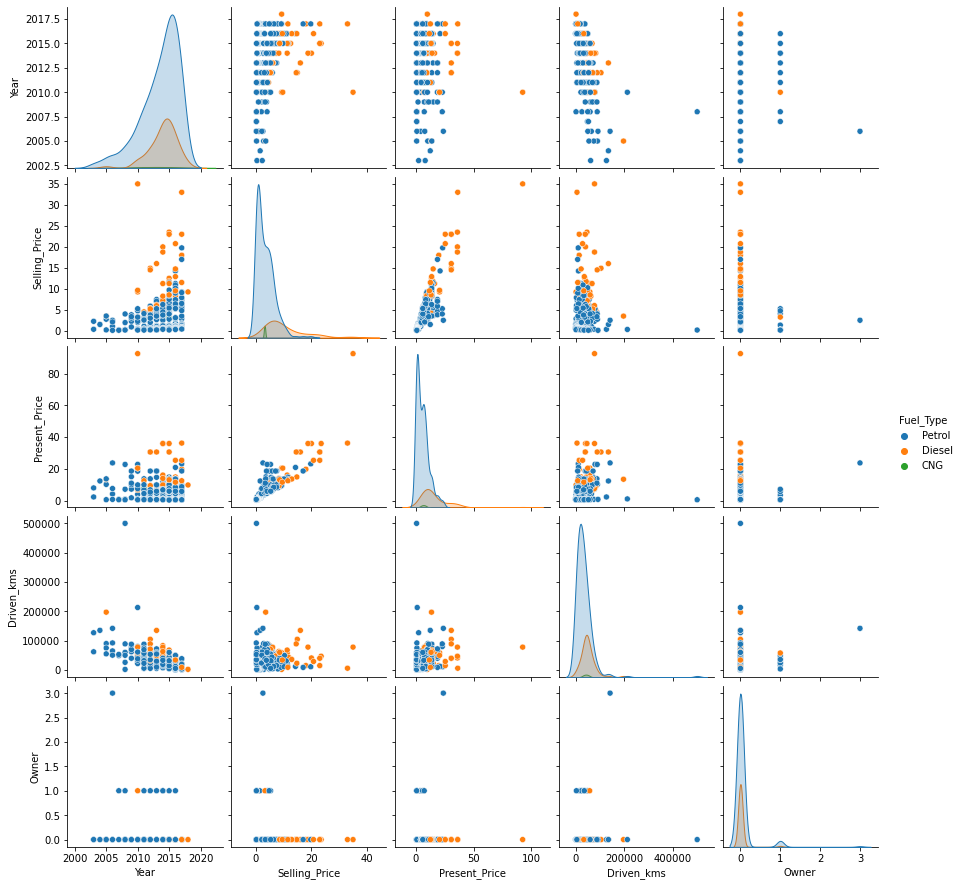

In [18]:
sns.pairplot(data,hue="Fuel_Type")

# correlarion

Text(0.5, 1.0, 'correletion between variables')

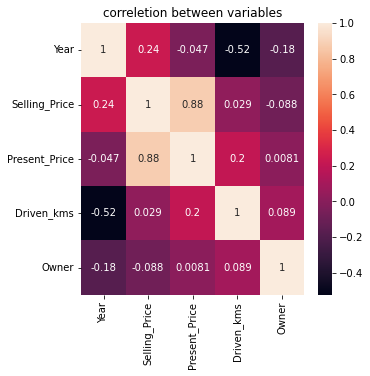

In [29]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True)
plt.title("correletion between variables")

# feature engineering
we have to convert the categorical variables to numerical variables that a model can understand

In [43]:
#encoding the fuel type
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
data.replace({"Selling_type":{"Dealer":0,"Individual":1}},inplace=True)
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [44]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# splitting the target variables and the features

In [45]:
x=data.drop(["Car_Name","Selling_Price"],axis=1)
y=data["Selling_Price"]

In [46]:
#printing the shape of the feature variables
x.shape

(301, 7)

In [47]:
#printing the shape of the target variable
y.shape

(301,)

# splitting training and the test data

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# model training using linear regression

In [49]:
lr=LinearRegression()

In [51]:
lr.fit(x_train,y_train)

LinearRegression()

# model evaluation

In [52]:
#predicting the training data
train_data_prediction=lr.predict(x_train)

In [53]:
#using R squared error to measure the peformance
error_score=metrics.r2_score(y_train,train_data_prediction)
print(error_score)

0.8834899874176633


# visualize the actual and predicted price

Text(0.5, 1.0, 'Actual price vs predicted prices')

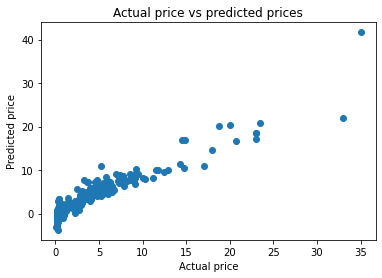

In [54]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted prices")

In [55]:
#predicting the test data
test_data_prediction=lr.predict(x_test)

In [56]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.840141567561468


# visualizing the test data

Text(0.5, 1.0, 'Actual price vs predicted prices')

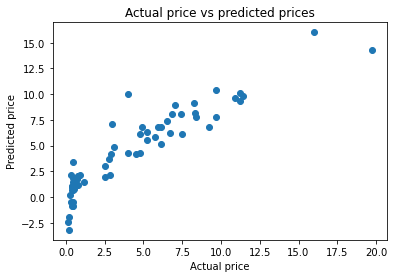

In [57]:

plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted prices")

# model training using lasso regression

In [62]:
lass=Lasso()

In [63]:
lass.fit(x_train,y_train)

Lasso()

In [66]:
train_data_prediction=lass.predict(x_train)

In [68]:
error_score=metrics.r2_score(y_train,train_data_prediction)
print(error_score)

0.8432138799266459


Text(0.5, 1.0, 'Actual price vs predicted prices')

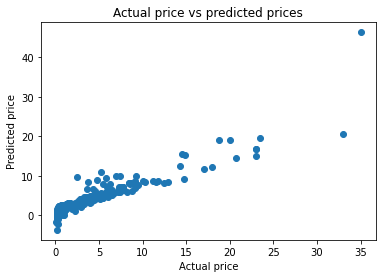

In [69]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted prices")

In [70]:
#predicting the test data
test_data_prediction=lr.predict(x_test)

In [71]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.840141567561468


Text(0.5, 1.0, 'Actual price vs predicted prices')

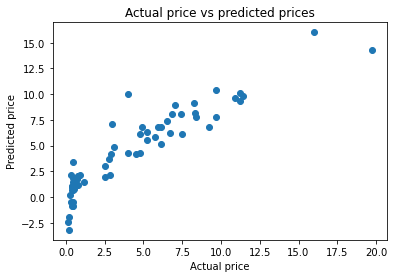

In [72]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted prices")